# 인공지능
## 지도학습: 문제, 정답을 알려주고 패턴을 찾는 것
* 분류분석, 회귀분석
## 비지도학습: 문제만 알려주고 알고리즘이 알아서 패턴을 찾는 것
* 군집분석

# 분류 분석의 대표적인 알고리즘 Tree 기반 모델
# 의사결정나무 (Decision Tree)
* Decision Tree는 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속 질문을 던져서 분리
## 장점
* 직관적이고 해석 쉬움
* feature scaling(변수) 필요 없음 (MinMax, StandardScaler 사용을 하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석할 수 있음
* 시각화가 쉽고 직관적
## 단점
* 과적합(overfitting)이 잘 일어남
* 최적의 트리를 찾기가 어렵고 시간이 오래 걸릴 수 있음




0. 필요한 라이브러리 로딩
1. 타이타닉 데이터 로딩
2. 데이터 전처리 (결측값 처리, 이상값 탐지)
3. EDA(탐색적 데이터 분석, 각 컬럼의 데이터 분포, 그래프로, 문자 -> 숫자, 상관관계)
4. feature Engineering(변수 선택, 새로운 특성 생성, 카텓=고리 변수의 더미 변수화 (one-hot encoding)
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. sklearn에서 DecisionTreeClassifier을 불러와서 모델 훈련
8. test 세트를 모델에 넣어서 예측값 생성(pred)
9. accuracy_score(), classificatio_report()를 이용해서 모델의 성능 확인

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [191]:
data = pd.read_csv("./data/Titanic_train.csv")

In [192]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [195]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [196]:
data = data.drop(['Cabin'], axis = 1)

In [197]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


In [198]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [199]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'].isna().sum()

np.int64(0)

In [200]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [201]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [202]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].isna().sum()

np.int64(0)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [204]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


이상값 탐지

<Axes: >

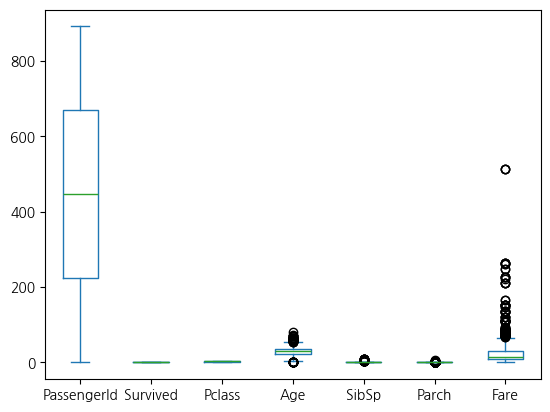

In [205]:
data.plot(kind='box')

In [206]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [207]:
fare_desc = data['Fare'].describe()

In [208]:
print(fare_desc, type()

SyntaxError: unexpected EOF while parsing (1977288488.py, line 1)

In [ ]:
upper_bound = fare_desc['75%'] + (1.5 * fare_desc['75%'] - fare_desc['25%'])
print(upper_bound)

In [ ]:
outliers = data[data['Fare'] > upper_bound]

In [ ]:
outliers

In [ ]:
fare_desc_pclass = data[['Pclass', 'Fare']].groupby('Pclass').describe()
fare_desc_pclass

In [ ]:
data['Fare'].max()

In [ ]:
fare_desc_pclass.columns

In [ ]:
p1_upper_bound = fare_desc_pclass.loc['Fare', 75%]

In [ ]:
fare_desc_pclass.loc[1, ('Fare', '75%')] + (1.5 * fare_desc_pclass['75%'] - fare_desc_pclass['25%'])

EDA

In [ ]:
data['Survived'].value_counts().plot(kind="pie")

In [ ]:
data.columns

In [ ]:
data['Pclass'].value_counts()

In [ ]:
data['Pclass'].value_counts().plot(kind='bar')

In [ ]:
data['Name'].nunique()

In [ ]:
data.isnull().sum()

In [ ]:
data['Sex'].value_counts()

In [ ]:
data['Age'].plot(kind='hist')

In [ ]:
data['SibSp'].value_counts().plot(kind='bar')

In [ ]:
data['Parch'].value_counts().plot(kind='bar')

In [ ]:
data.columns

In [ ]:
# data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
data

In [ ]:
data.columns

In [ ]:
data[['Survived', 'Pclass']].groupby('Pclass').mean()

In [ ]:
data[['Survived', 'Sex']].groupby('Sex').mean()

In [ ]:
data[['Survived', 'Embarked']].groupby('Embarked').mean()

In [ ]:
data['Age'].value_counts()

In [ ]:
data['Age'] = pd.cut(data['Age'], 
       bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
                    right=False)

In [ ]:
data[data['Age2'] == '80s']

In [ ]:
data[['Survived', 'Embarked']].groupby('Embarked').mean()

In [209]:
data['Family'] = data['SibSp'] + data['Parch']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [210]:
data.drop(['SibSp', 'Parch'], axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [211]:
data[['Survived', 'Family']].groupby('Family').mean().sort_values(by='Survived', ascending=False)

,Survived
Family,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [213]:
data[['Survived', 'Family', 'Sex', 'Age']].groupby(['Pclass', 'Sex', 'Age']).mean()

KeyError: 'Pclass'

문자데이터 숫자로 인코딩, 

In [215]:
data.drop('Fare', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [217]:
pd.get_dummies(data, columns=['Sex', 'Age', 'Embarked', 'Family'], drop_first=True)

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_male,Age_0.67,...,Embarked_Q,Embarked_S,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,True,False,...,False,True,True,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,False,False,...,False,True,True,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0,211536,13.0000,True,False,...,False,True,False,False,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,False,False,...,False,True,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,False,False,...,False,True,False,False,True,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,True,False,...,False,False,False,False,False,False,False,False,False,False


# 독립변수 (문제, X) 종속변수 (답, y)

In [218]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [219]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [220]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 데이터를 훈련 데이터와 테스트 데이터로 분할
# 홀드아웃

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

# 분석 모델 선택 및 분석

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [224]:
dtc = DecisionTreeClassifier(random_state=777)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

ValueError: could not convert string to float: 'Christmann, Mr. Emil'